# MTHM503J Week 2: Linear Regression

# Implementing simple linear regression with numpy and with scikit-learn on simulated data

## Linear regression from scratch with numpy

In [1]:
import numpy as np
from matplotlib import pyplot as plt

### Simulate inputs

Simulate inputs $x_1, \dots, x_n$ from standard Normal distribution as a column vector, i.e. a matrix with 1 column and $n$ rows:

In [2]:
np.random.seed(123) # make it reproducible
n = 20 # sample size
x = np.random.normal(size=(n,1))

### Simulate outputs

Simulate outputs as $$y_i = 1 + 0.5 x_i + \epsilon_i$$ where $\epsilon_i$ has a Normal distribution with mean zero and standard deviation $0.2$:

In [3]:
e = np.random.normal(loc=0, scale=0.2, size=x.shape)
y = 1 + 0.5 * x + e

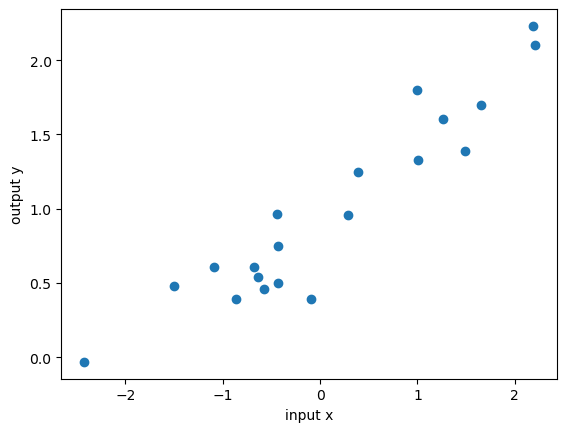

In [4]:
plt.plot(x, y, 'o')
plt.xlabel('input x')
plt.ylabel('output y')
plt.show()

The data was simulated as a linear regression with parameters $\beta_0 = 1$ and $\beta_1 = 0.5$. Our goal will be to estimate these parameters from the simulated $x$ and $y$ values using least squares estimation.

## Estimate the regression coefficients by least squares

Let $y$ be the vector of length $n$ that contains the outputs $y_1, \dots, y_n$. Let $X$ be a matrix with $n$ rows and 2 columns, whose first column consists only of ones, and whose second column contains the simulated inputs $x_1, \dots, x_n$.

For a given vector of coefficients $\beta = (\beta_0, \beta_1)'$, the sum of squared residuals between the true outputs $y$ and the fitted values $X\beta$ is given by

$$RSS = (y - X\beta)'(y - X\beta)$$

Setting the derivative of RSS w.r.t. $\beta$ to 0 yields the system of equations for the estimated coefficients $\hat\beta$ given by

$$X'X\hat\beta = X'y$$

from which the usual least squares estimators of $\beta$ can be derived as

$$\hat\beta = (X'X)^{-1}X'y$$.

To calculate $\hat\beta$ we first create the design matrix $X$ by combining a column of ones and the vector $x$:

In [5]:
# create design matrix X by combining x and a column vector of 1s
X = np.hstack([np.ones([n,1]), x])
X

array([[ 1.        , -1.0856306 ],
       [ 1.        ,  0.99734545],
       [ 1.        ,  0.2829785 ],
       [ 1.        , -1.50629471],
       [ 1.        , -0.57860025],
       [ 1.        ,  1.65143654],
       [ 1.        , -2.42667924],
       [ 1.        , -0.42891263],
       [ 1.        ,  1.26593626],
       [ 1.        , -0.8667404 ],
       [ 1.        , -0.67888615],
       [ 1.        , -0.09470897],
       [ 1.        ,  1.49138963],
       [ 1.        , -0.638902  ],
       [ 1.        , -0.44398196],
       [ 1.        , -0.43435128],
       [ 1.        ,  2.20593008],
       [ 1.        ,  2.18678609],
       [ 1.        ,  1.0040539 ],
       [ 1.        ,  0.3861864 ]])

In [6]:
y

array([[ 0.60465841],
       [ 1.79681913],
       [ 0.95432248],
       [ 0.48201845],
       [ 0.45992374],
       [ 1.69816797],
       [-0.03191858],
       [ 0.49980755],
       [ 1.60495439],
       [ 0.39427882],
       [ 0.60943305],
       [ 0.39292769],
       [ 1.39138819],
       [ 0.54057355],
       [ 0.96350151],
       [ 0.74809723],
       [ 2.10353422],
       [ 2.23103759],
       [ 1.32611968],
       [ 1.24981866]])

When coding the least squares estimating equation, it is tempting to first explicitly calculate the matrix inverse $(X'X)^{-1}$ using `np.linalg.inv`, and then multiplying this inverse by  $X'y$. However, this is inefficient, especially in settings where the number of predictors $p$ is large. 

The more efficient implementation is to solve the system of equations $X'X\beta = X'y$ for $\beta$ using the numpy function `np.linalg.solve`. This approach is $p$ times faster than calculating the explicit matrix inverse.

In [7]:
XtX = np.matmul(X.transpose(), X)
Xty = np.matmul(X.transpose(), y)
beta_hat = np.linalg.solve(XtX, Xty) # linalg.solve(A,b) returns x such that Ax = b

In [8]:
beta_hat

array([[0.94636006],
       [0.47731346]])

The true parameters that were used to simulate the $y$ data were $\beta_0 = 1$ and $\beta_1 = 0.5$, so the estimated values are reasonably close to the true ones.

### Predict $y$ at new input values

Let's say I want to use the fitted parameters to predict $y$ at the input values $(-1, 0, 0.5, 1)$.

In [9]:
x_new = np.array([-1, 0, 0.5, 1])
# create design matrix for new input values in one line using
# np.stack() and np.ones_like()
X_new = np.stack([np.ones_like(x_new), x_new], axis=1)
X_new

array([[ 1. , -1. ],
       [ 1. ,  0. ],
       [ 1. ,  0.5],
       [ 1. ,  1. ]])

Use the fitted parameters to predict $y$ for these inputs:

In [10]:
y_new = np.matmul(X_new, beta_hat)
y_new

array([[0.4690466 ],
       [0.94636006],
       [1.18501679],
       [1.42367352]])

### Plot the fitted regression line

To visualise the entire regression line, we predict $y$ for a range of $x$ values and then plot them against each other.

In [11]:
x_ran = np.linspace(-3, 3, 100)
X_ran = np.stack([np.ones_like(x_ran), x_ran], axis=1)
y_pred = np.matmul(X_ran, beta_hat)

We also include the regression line using the true parameter values.

In [12]:
beta_true = np.array([1, 0.5]).reshape(2,1)
y_true = np.matmul(X_ran, beta_true)

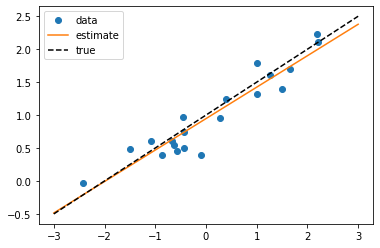

In [13]:
plt.plot(x,y,'o', label='data')
plt.plot(x_ran, y_pred, '-', label='estimate')
plt.plot(x_ran, y_true, '--k', label='true')
plt.legend()
plt.show()

## Linear regression with scikitlearn

Import the linear regression module from the `scikit-learn` package

In [14]:
from sklearn.linear_model import LinearRegression

Initialise a linear regression object:

In [15]:
lr = LinearRegression()

Use the object `lr` to fit a regression model using the previously simulated training data in `x` and `y`. There is no need to add a column of ones, since the intercept will be estimated automatically.

In [16]:
lr_fit = lr.fit(x.reshape(n,1), y)

### Extract parameter estimates

The fitted regression coefficient are stored in the `lr_fit` object and can be extracted with

In [17]:
lr_fit.coef_

array([[0.47731346]])

To extract the fitted intercept use

In [18]:
lr_fit.intercept_

array([0.94636006])

It's not surprising, but still reassuring, that the parameter estimates obtained from scikit-learn are identical to the ones we have obtained using only numpy functions.

### Predict new values

We use the same values `x_new` as before to predict `y` using the built-in scikit-learn function. We do not have to provide a column of ones to multiply the intercept, `lr_fit.predict` knows that the intercept has to be added. But we have to provide the inputs as a matrix with number of columns equal to the number of inputs in the model (namely `p=1`):

In [19]:
lr_fit.predict(x_new.reshape(-1,1))

array([[0.4690466 ],
       [0.94636006],
       [1.18501679],
       [1.42367352]])

And now we predict `y` for all values in `x_ran` so we can plot the regression line as before:

In [20]:
y_pred = lr_fit.predict(x_ran.reshape(-1,1))

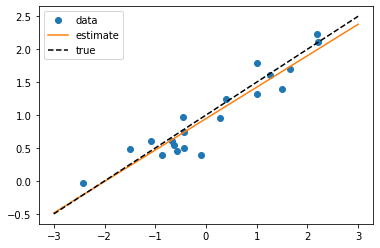

In [21]:
plt.plot(x,y,'o', label='data')
plt.plot(x_ran, y_pred, '-', label='estimate')
plt.plot(x_ran, y_true, '--k', label='true')
plt.legend()
plt.show()

### General patterns when working with scikit-learn

- input data are provided as a **feature matrix**, i.e. as a matrix whose rows are cases, or observations, and whose columns correspond to the different input variables, also referred to as features
- target data are provided as an array whose length is equal to the number of rows in the feature matrix (can also be a pandas.Series)

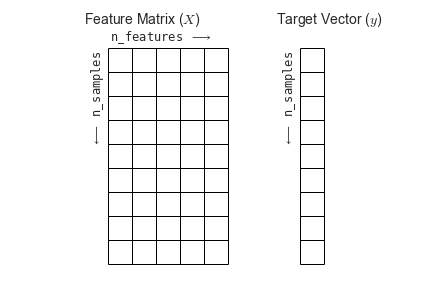

- invoking scikit-learn starts by choosing a class of model (`linear_model` in our case) and the estimator class (`LinearRegression`)
- often we will have to specify hyperparameters, parameters that control the general behavior of the model, e.g. convergence tolerances, number of iteration, penalty parameters
- after initialising the model class, we call the `fit()` method
- to apply the model to new data, for prediction or exploration, we call the `predict()` method

# Using a different machine learning method

With its consistent interface Scikit-learn makes it easy to swap one machine learning method for another one. In this section we will apply Nearest neighbors regression to our training data instead of linear regression. All regression methods provided by scikit-learn can be viewed on the [scikit-learn website](https://scikit-learn.org/stable/index.html). The example given here is based on the [scikit-learn Nearest Neighbors regression example](https://scikit-learn.org/stable/auto_examples/neighbors/plot_regression.html).

First we have to import the correct submodule of `sklearn`:

In [22]:
from sklearn import neighbors

Then (as with linear regression) we initialise the model object, and use the `fit` function to train the model.

In [23]:
knn = neighbors.KNeighborsRegressor()
knn_fit = knn.fit(x.reshape(-1,1), y)

Now we can use the `predict` function to predict the target variable `y` at new `x` values:

In [24]:
knn_fit.predict(x_new.reshape(-1,1))

array([[0.52177352],
       [0.76899472],
       [1.14400153],
       [1.47382001]])

To visualise the shape of the fitted function, we apply `predict` to a whole range of `x` values as before:

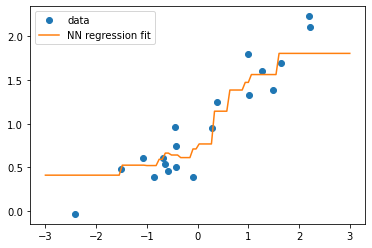

In [25]:
y_ran = knn_fit.predict(x_ran.reshape(-1,1))
plt.plot(x,y,'o', label='data')
plt.plot(x_ran, y_ran, '-', label='NN regression fit')
plt.legend()
plt.show()

The fitted function looks quite different from the fitted function we got from linear regression. It seems nearest neighbor regression can fit more complicated, non-linear relationships. The smoothness of the fitted curve can be controlled by the input parameters of `neighbors.KNeighborsRegressor()`, in particular the arguments `n_neighbors` and `weights`.